<a href="https://colab.research.google.com/github/swastikbanerjee/CV_Lab/blob/main/cv_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement Non-Linear Spatial Filtering using Built-in and user defined functions**

---



**Importing Necessary Libraries**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
from scipy.ndimage import maximum_filter, minimum_filter, generic_filter
from skimage.util import random_noise

**Reading the Image**

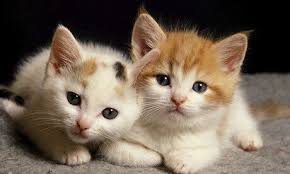

In [ ]:
image = cv2.imread("img3.jpeg")
cv2_imshow(image)

**Introducing Noise to the image**

(<Axes: title={'center': 'Image with Salt&Pepper Noise'}>,
 Text(0.5, 1.0, 'Image with Salt&Pepper Noise'),
 (-0.5, 289.5, 173.5, -0.5))

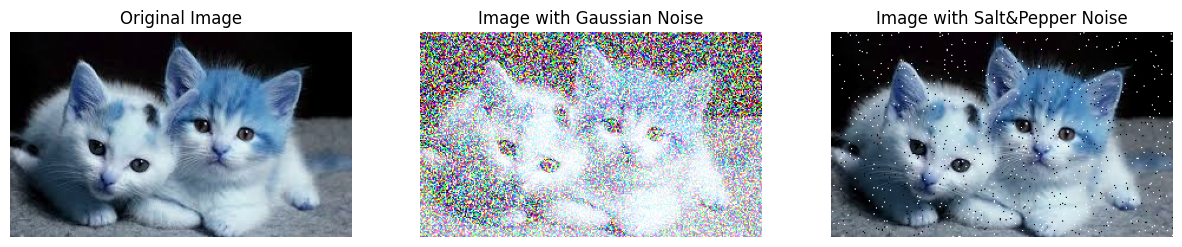

In [ ]:
# Guassian Noise

def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image
gauss_noise = add_gaussian_noise(image, mean=0, std=25)

# Salt and Pepper Noise

def add_salt_and_pepper_noise(image, noise_ratio=0.02):
    noisy_image = image.copy()
    h, w, c = noisy_image.shape
    noisy_pixels = int(h * w * noise_ratio)
    for _ in range(noisy_pixels):
        row, col = np.random.randint(0, h), np.random.randint(0, w)
        if np.random.rand() < 0.5:
            noisy_image[row, col] = [0, 0, 0]
        else:
            noisy_image[row, col] = [255, 255, 255]
    return noisy_image
salt_pep_noise = add_salt_and_pepper_noise(image, noise_ratio=0.02)

plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(image,'gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(132), plt.imshow(gauss_noise,'gray'), plt.title("Image with Gaussian Noise"), plt.axis('off')
plt.subplot(133), plt.imshow(salt_pep_noise,'gray'), plt.title("Image with Salt&Pepper Noise"), plt.axis('off')

In [ ]:
filename = "/content/SaltPep.jpg"
cv2.imwrite(filename,salt_pep_noise)

True

In [ ]:
filename = "/content/Gauss.jpg"
cv2.imwrite(filename,gauss_noise)

True

(<Axes: title={'center': 'Image with Gaussian Noise'}>,
 Text(0.5, 1.0, 'Image with Gaussian Noise'),
 (-0.5, 289.5, 173.5, -0.5))

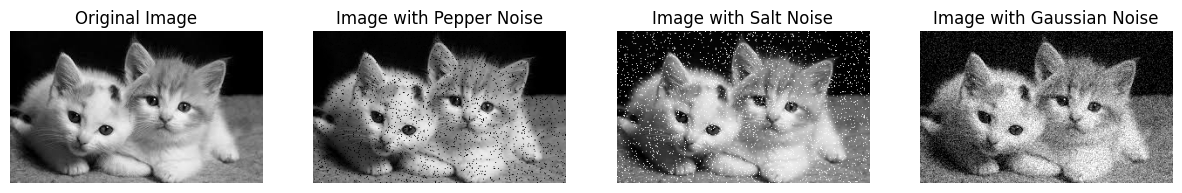

In [ ]:
image = cv2.imread("img3.jpeg", cv2.IMREAD_GRAYSCALE)

image_pepper = random_noise(image, mode='pepper')
image_salt = random_noise(image, mode='salt')
image_gaussian = random_noise(image, mode='localvar')


plt.figure(figsize=(15,10))
plt.subplot(141), plt.imshow(image,'gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(142), plt.imshow(image_pepper,'gray'), plt.title("Image with Pepper Noise"), plt.axis('off')
plt.subplot(143), plt.imshow(image_salt,'gray'), plt.title("Image with Salt Noise"), plt.axis('off')
plt.subplot(144), plt.imshow(image_gaussian,'gray'), plt.title("Image with Gaussian Noise"), plt.axis('off')

**Median filter**
---
The median filter is the one type of nonlinear filters. It is very effective at removing impulse noise, the “salt and pepper” noise, in the image.



User-Defined

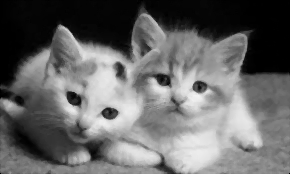

In [ ]:
salt_pep_noise = cv2.imread("SaltPep.jpg",cv2.IMREAD_GRAYSCALE)
def median_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.median(neighbors)
    return result
median_custom = median_filter_custom(salt_pep_noise, kernel_size=3)
cv2_imshow(median_custom)

In-Built Method

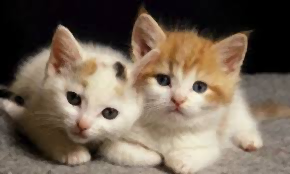

In [ ]:
median_built_in = cv2.medianBlur(salt_pep_noise, 3)
cv2_imshow(median_built_in)

(<Axes: title={'center': 'Built-in Median Filter'}>,
 Text(0.5, 1.0, 'Built-in Median Filter'),
 (-0.5, 289.5, 173.5, -0.5))

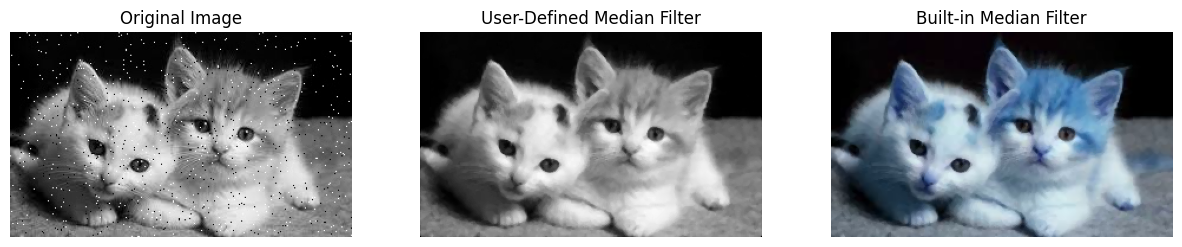

In [ ]:
# Comparison

plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(salt_pep_noise,'gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(132), plt.imshow(median_custom,'gray'), plt.title("User-Defined Median Filter"), plt.axis('off')
plt.subplot(133), plt.imshow(median_built_in,'gray'), plt.title("Built-in Median Filter"), plt.axis('off')

# **Max and Min filter**

---


**Max Filter**

This filter is useful for finding the brightest points in an image. Since pepper noise has very low values, it is reduced by this filter as a result of the max selection processing the sub image area Axy.
We can remove pepper noise by using max filter.

User-Defined

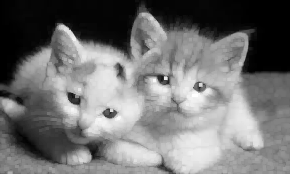

In [ ]:
def max_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.max(neighbors)
    return result
max_custom = max_filter_custom(image_pepper, kernel_size=3)
cv2_imshow(max_custom)

In-Built Method

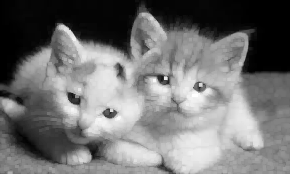

In [ ]:
max_built_in = maximum_filter(image_pepper, size=3)
cv2_imshow(max_built_in)

(<Axes: title={'center': 'Built-in Maximum Filter'}>,
 Text(0.5, 1.0, 'Built-in Maximum Filter'),
 (-0.5, 289.5, 173.5, -0.5))

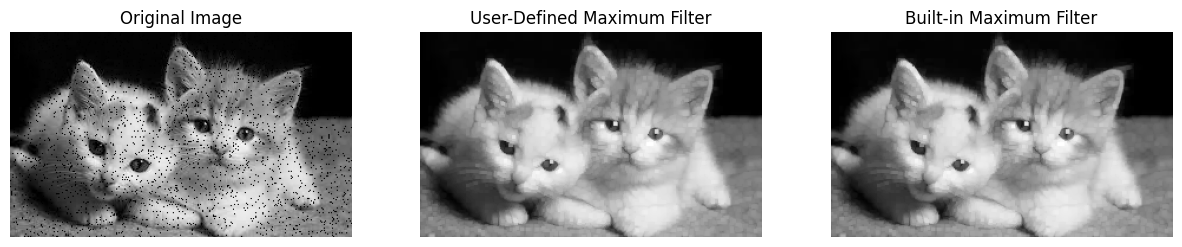

In [ ]:
# Comparison

plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(image_pepper,'gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(132), plt.imshow(max_custom,'gray'), plt.title("User-Defined Maximum Filter"), plt.axis('off')
plt.subplot(133), plt.imshow(max_built_in,'gray'), plt.title("Built-in Maximum Filter"), plt.axis('off')

**Minimum Filter**

This filter is useful for finding the darkest points in an image. Also, it reduces salt noise as a result of the min operation.
We can remove salt noise by using min filter.

**Mid-Point filter**

---
User-Defined


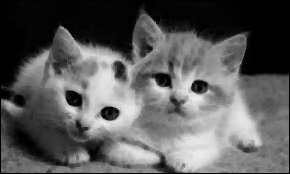

In [ ]:
image_salt = (255 * image_salt).astype(np.uint8)
def min_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.min(neighbors)
    return result
min_custom = min_filter_custom(image_salt, kernel_size=3)
cv2_imshow(min_custom)

In-Built Method

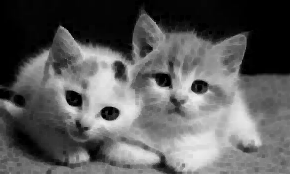

In [ ]:
min_built_in = minimum_filter(image_salt, size=3)
cv2_imshow(min_built_in)

(<Axes: title={'center': 'Built-in Minimum Filter'}>,
 Text(0.5, 1.0, 'Built-in Minimum Filter'),
 (-0.5, 289.5, 173.5, -0.5))

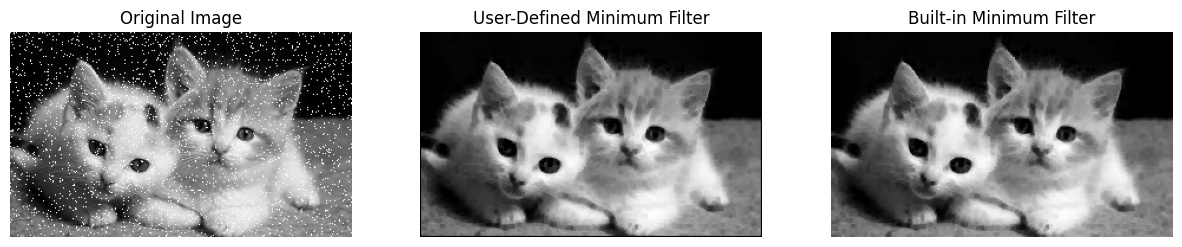

In [ ]:
# Comparison

plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(image_salt,'gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(132), plt.imshow(min_custom,'gray'), plt.title("User-Defined Minimum Filter"), plt.axis('off')
plt.subplot(133), plt.imshow(min_built_in,'gray'), plt.title("Built-in Minimum Filter"), plt.axis('off')

# **Mid-Point Filter**

---

The midpoint filter simply computes the midpoint between the maximum and minimum values in the area encompassed by the filter. This filter works best for randomly distributed noise, like Gaussian or uniform noise.

User-Defined

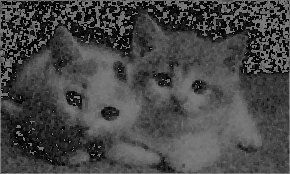

In [ ]:
gauss_noise = cv2.imread("Gauss.jpg",cv2.IMREAD_GRAYSCALE)
def midpoint_filter(image, kernel_size):
    max_filtered = max_filter_custom(image, kernel_size)
    min_filtered = min_filter_custom(image, kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result
midpoint_custom = midpoint_filter(gauss_noise, kernel_size=3)
cv2_imshow(midpoint_custom)

In-Built Method

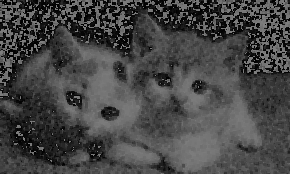

In [ ]:
def midpoint_filter(image, kernel_size):
    max_filtered = maximum_filter(image, kernel_size)
    min_filtered = minimum_filter(image, kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result
midpoint_built_in = midpoint_filter(gauss_noise, kernel_size=3)
cv2_imshow(midpoint_built_in)

(<Axes: title={'center': 'Built-in Mid-Point Filter'}>,
 Text(0.5, 1.0, 'Built-in Mid-Point Filter'),
 (-0.5, 289.5, 173.5, -0.5))

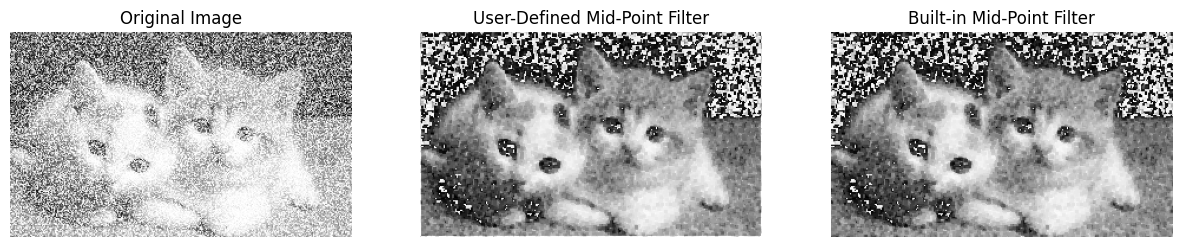

In [ ]:
# Comparison

plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(gauss_noise,'gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(132), plt.imshow(midpoint_custom,'gray'), plt.title("User-Defined Mid-Point Filter"), plt.axis('off')
plt.subplot(133), plt.imshow(midpoint_built_in,'gray'), plt.title("Built-in Mid-Point Filter"), plt.axis('off')

# **Alpha-Trimmed filter**

---
It is useful for the multiple types of noise such as the combination of salt-and-pepper and Gaussian noise.

User-Defined

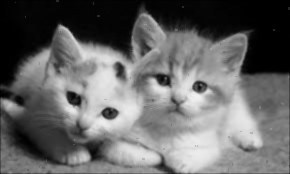

In [ ]:
def alpha_trimmed_filter(image, kernel_size, alpha):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            neighbors = np.sort(neighbors)
            trimmed_neighbors = neighbors[alpha:-alpha]
            result[i, j] = np.mean(trimmed_neighbors)
    return result
alpha_trimmed_custom = alpha_trimmed_filter(salt_pep_noise, kernel_size=3, alpha=1)
cv2_imshow(alpha_trimmed_custom)

In-Built Method

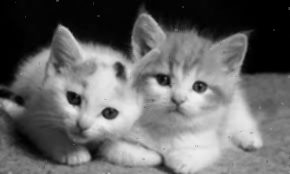

In [ ]:
def alpha_trimmed_filter(image, kernel_size, alpha):
    def alpha_trimmed_mean(data):
        sorted_data = np.sort(data)
        trimmed_data = sorted_data[alpha:-alpha]
        return np.mean(trimmed_data)
    result = generic_filter(image, alpha_trimmed_mean, size=kernel_size)
    return result
alpha_trimmed_built_in = alpha_trimmed_filter(salt_pep_noise, kernel_size=3, alpha=1)
cv2_imshow(alpha_trimmed_built_in)

(<Axes: title={'center': 'Built-in Alpha Trimmed Filter'}>,
 Text(0.5, 1.0, 'Built-in Alpha Trimmed Filter'),
 (-0.5, 289.5, 173.5, -0.5))

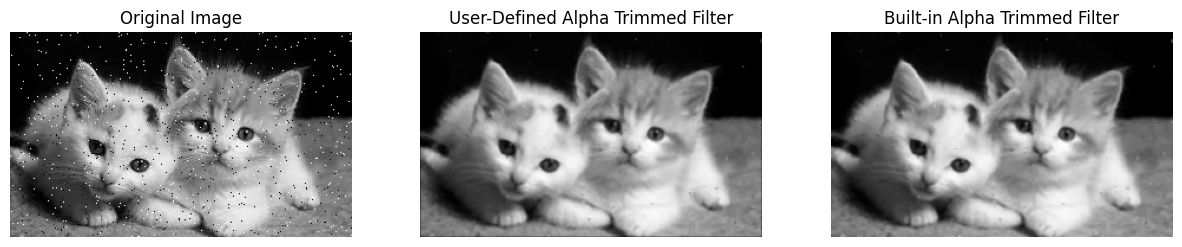

In [ ]:
# Comparison

plt.figure(figsize=(15,10))
plt.subplot(131), plt.imshow(salt_pep_noise,'gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(132), plt.imshow(alpha_trimmed_custom,'gray'), plt.title("User-Defined Alpha Trimmed Filter"), plt.axis('off')
plt.subplot(133), plt.imshow(alpha_trimmed_built_in,'gray'), plt.title("Built-in Alpha Trimmed Filter"), plt.axis('off')